# **Modelo SIRDV para simulação da COVID-19 em Pernambuco**

Por:

Leônidas Dantas de Castro Netto (ldcn)

Matheus Júlio Boncsidai de Oliveira (mjbo)

Victória Luquet Tewari (vllst)

CIn-UFPE, Recife

#**Introdução**

&nbsp;&nbsp;&nbsp;&nbsp; A Covid-19 é virus capaz de causar uma epidemia e, de fato, vem causando desde o final de 2019. Ao passar dos anos, foram desenvolvidos modelos epidemiológicos, que fazem uso de sistemas de Equações Ordinárias Diferenciais, ou do inglês, ODE's (Ordinary Diferential Equations). Com esses modelos, é possível fazer uma simulação de como uma epidemia irá se comportar com base em diversos parâmetros.

O modelo mais básico é o modelo *S.I.R*, onde:
- S - Suscetíveis
- I - Infectados
- R - Recuperados/Removidos

Consegue abordar uma equação para cada uma dessas classes, onde cada equação mostra uma curva da evolução da epidemia em relação a cada classe com o tempo.

&nbsp;&nbsp;&nbsp;&nbsp; Neste projeto será utilizado um modelo semelhante a esse, porém com mais duas equações, que é o modelo *S.I.R.D.V*, que trata:
- D - Deceased (Óbitos)
- V - Vacinados

Mais detalhes sobre o modelo serão mostrado adiante.

#**Objetivo**



&nbsp;&nbsp;&nbsp;&nbsp;O objetivo do projeto é mostrar o avanço, ou comportamento, da Covid-19 no estado de Pernambuco nos próximos anos por meio de um sistema de equações diferenciais, ou seja, um modelo epidemiológico. Serão utilizados aguns bancos de dados para mostrar o comportamento da Covid-19 quando combatida com as vacinas mais utilizadas, neste caso, Pfizer, AstraZeneca, CoronaVac e Janssen.



&nbsp;&nbsp;&nbsp;&nbsp; Além disso, foi feita uma breve análise dos dados obtidos, onde é possível ver a tabela geral dos dados, e alguns gráficos que mostram as distribuições dos principais atributos ao longo do tempo.





#**Métodos**

##Código




Foram utlizadas algumas bibliotecas de Python, tanto para simulação quanto para análise de dados, sendo elas:

- Pandas (Leitura e manuseio do banco de dados)
- Numpy (Suporte para operações e plotagem)
- Scipy (Suporte para o modelo de ODE's)
- Matplotlib (Plotagem da simulação)
- Seaborn (Plotagem para análise dos dados)



##Sistema de ODE's utlizado (MODELO: SIRDV)



$$
\frac{dS}{dt} = -\beta \cdot SI-\alpha\cdot S\\
\frac{dI}{dt} = -\beta \cdot SI + \beta\cdot (1-\eta)\cdot V - \gamma\cdot\mu\cdot I-\gamma \cdot I \\
\frac{dR}{dt} = -\gamma \cdot I-\alpha\cdot R \\
\frac{dD}{dt} = -\gamma \cdot\mu\cdot I \\
\frac{dV}{dt} = -\beta\cdot (1-\eta)\cdot V + \alpha\cdot S + \alpha\cdot R
$$

onde:

- $\beta$ = Taxa de transmissão
- $\gamma$ = Taxa de recuperação
- $\mu$ = taxa de mortalidade
- $\alpha$ = taxa de vacinação
- $\eta$ = eficácia da vacina

Neste caso, iremos utilizar 4 vacinas diferentes, cujas eficácias são:
- Pfizer: 95%
- AstraZeneca: 63,09%
- CoronaVac: 51%
- Janssen: 85,4%

Segundo o site da OMS.

Taxa de transmissão, segundo a OMS, no dia 10/05/2022 é **1,16**

Taxa de recuperação, segundo a OMS, fica entre aproximadamente 17 dias em média, logo **1/17**


As outras taxas são obtidas pelo banco de dados.

#**Análise dos dados**

##Dados gerais

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [ ]:
general_Data = pd.read_csv('./Dados_Gerais.csv')

total_lines = len(general_Data)

general_Data

,dt_referencia,dt_atualizacao,confirmados,obitos,tx_obitos,recuperados,tx_recuperados,isolamento,tx_isolamento,enfermaria,tx_enfermaria,uti,tx_uti,testes_novos,testes_acumulados,tx_testes,leitos_uti,tx_oc_uti,leitos_enf,tc_oc_enf
0,2020-04-03,NaN,176,14,0.080,23,0.131,87,0.569,34,0.222,18,0.102,0,0,0,0,0.00,0,0.00
1,2020-04-04,NaN,201,21,0.104,25,0.124,87,0.494,49,0.278,19,0.094,0,0,0,0,0.00,0,0.00
2,2020-04-05,NaN,223,30,0.134,25,0.112,101,0.510,44,0.222,23,0.103,0,0,0,0,0.00,0,0.00
3,2020-04-06,NaN,352,34,0.097,32,0.091,166,0.519,94,0.294,26,0.074,0,0,0,0,0.00,0,0.00
4,2020-04-07,NaN,401,46,0.115,32,0.080,189,0.512,110,0.298,24,0.060,0,0,0,0,0.00,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,2022-03-15,NaN,871578,21242,0.024,715816,0.821,324,0.002,870,0.006,725,0.001,8012,3683503,383698,1036,0.46,1103,0.33
712,2022-03-16,NaN,874704,21253,0.024,717698,0.821,320,0.002,892,0.006,722,0.001,10163,3693666,384757,1036,0.46,1103,0.33
713,2022-03-17,NaN,877324,21262,0.024,719340,0.820,322,0.002,880,0.006,719,0.001,8206,3701872,385612,1036,0.46,1103,0.33
714,2022-03-18,NaN,879622,21273,0.024,721117,0.820,322,0.002,854,0.005,706,0.001,787,3702659,385694,1011,0.43,1051,0.33


- Histograma do número de confirmados

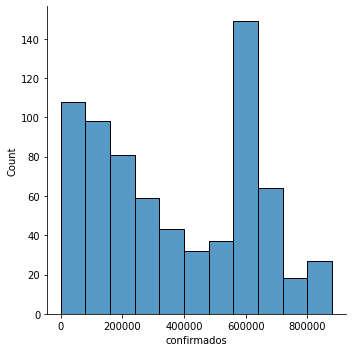

In [ ]:
sns.displot(general_Data['confirmados']);

- Histograma do número de óbitos

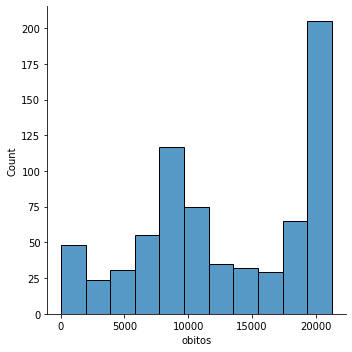

In [ ]:
sns.displot(general_Data['obitos']);

##Tabela de vacinados

In [ ]:
vaccinated_Data = pd.read_csv('./NumeroVacinados_1.csv')

vaccinated_Data

,Dose 1,Dose 2,Dose 3
2021-01-12,5,0,0
2021-01-13,1,0,0
2021-01-14,0,0,0
2021-01-15,1,0,0
2021-01-16,0,0,0
...,...,...,...
2022-03-15,2241,3942,13999
2022-03-16,2275,4003,14619
2022-03-17,1626,3692,11590
2022-03-18,1460,3162,8755


###Resumo de cada Dose.

In [ ]:
vaccinated_Data["Dose 1"].describe()

In [ ]:
vaccinated_Data["Dose 2"].describe()

In [ ]:
vaccinated_Data["Dose 3"].describe()

In [ ]:
Dose1 = vaccinated_Data['Dose 1'].sum()
Dose2 = vaccinated_Data['Dose 2'].sum()
Dose3 = vaccinated_Data['Dose 3'].sum()
print(f'Total de doses aplicadas desde o início para \nDose 1: {Dose1}\nDose 2: {Dose2}\nDose 3: {Dose3}')

###Distribuição de cada Dose.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


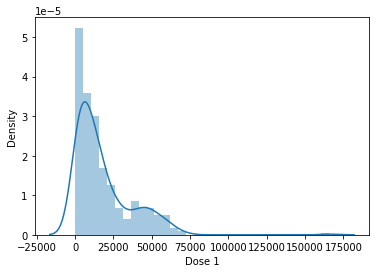

In [ ]:
sns.distplot(vaccinated_Data['Dose 1']);

In [ ]:
sns.distplot(vaccinated_Data['Dose 2']);

In [ ]:
sns.distplot(vaccinated_Data['Dose 3']);

#**Simulação**

##Separando os dados de interesse

In [ ]:
pop_total_pe = 9674793

tx_obitos = general_Data.iloc[:, [4]].values # todas as linhas e coluna 4
tx_recuperados = general_Data.iloc[:, [6]].values # todas as linhas e coluna 6

total_casos = general_Data.iloc[:, [2]] # todas as linhas e coluna 2

general_Data.iloc[:, [6]].values.sum()

##Simulação do modelo

In [ ]:
t = np.linspace(0, 100, 100) # Gerando um espaço de tempo
called_amount = 0

# Equação da Morte
def deathRate(t):
  global called_amount
  value = tx_obitos[called_amount]
  called_amount = called_amount + 1
  return value

def rhsDeath(D, t, deathRate):
  dDdt = deathRate(t)
  return dDdt

D0 = tx_obitos[0]

D = odeint(rhsDeath, D0, t, args=(deathRate, ))

# Explicitando as Taxas
tx_transmissao = 1.16 / pop_total_pe
tx_morte = general_Data.iloc[:, [4]].values.sum() / total_lines
tx_rec = 1./17

# Taxa de Vacinação = os vacinados serao considerados aqueles com a terceira dose
tx_vac = 2281034/305/pop_total_pe # 240 -> tempo no qual a terceira dose entrou em cena

# Eficácia da Vacina = média das eficacias das principais vacinas distribuidas (pfizer, astrazeneca, janssen e coronavac)
eficiencia_vac = (0.95 + 0.6309 + 0.51 + 0.854) / 4

I0, R0, D0, V0 = 154999, 725405, 21285, 2281034
S0 = pop_total_pe - I0 - R0 - D0

def SIRDV_Model(y, t, tx_transmissao, tx_rec, tx_morte, tx_vac, eficiencia_vac):
    S, I, R, D, V = y
    dSdt = -tx_transmissao * S * I
    dIdt = tx_transmissao * S * I - tx_rec * tx_morte * I - tx_rec * I
    dRdt = tx_rec * I
    dDdt = tx_rec * tx_morte * I
    dVdt = -tx_transmissao*(1 - eficiencia_vac) * V + tx_vac * S + tx_vac * R
    return dSdt, dIdt, dRdt, dDdt, dVdt

# Condições iniciais
y0 = S0, I0, R0, D0, V0

# Resolvendo o Sistema de ODEs
solution = odeint(SIRDV_Model, y0, t, args=(tx_transmissao, tx_rec, tx_morte, tx_vac, eficiencia_vac))
S, I, R, D, V = solution.T

plt.figure(figsize=(12, 6))
plt.plot(t, S / pop_total_pe, 'g-', linewidth=2, label="Suscetiveis")
plt.plot(t, I / pop_total_pe, 'r-', linewidth=2, label="Infectados")
plt.plot(t, R / pop_total_pe, 'b-', linewidth=2, label="Recuperados")
plt.plot(t, D / pop_total_pe, 'c-', linewidth=2, label="Mortes")
plt.plot(t, V / pop_total_pe, 'y-', linewidth=2, label="Vacinados")
plt.xlabel('t')
plt.grid()
plt.legend()
plt.show()

# **Conclusão dos resultados**

Para nosso projeto, utilizamos do Modelo Epidemiológico SIRDV, uma variante do Modelo SIR no qual é incluído dados de óbitos (representado pela letra D - Deceased) e de vacinados (V). Foi utilizado todos os dados de desde o início da pandemia até o dia 19 de março de 2022 como base para resolução das ODE's e para ser realizada a previsão das taxas.

A partir dos dados alcançados, foi formado um gráfico que acompanha e prevê o desenvolvimento das taxas abordadas e, através dele, podemos concluir que:

- A **taxa de suscetíveis** tende a zerar porque é influenciada pela taxa de vacinados, que é linear (prevendo que o ritmo de vacinação tenderá, mesmo que aos poucos, a 100% da população)
- A **taxa de infectados**, a medida que o tempo passa, é cada vez menor, pois a taxa de vacinados também influencia diretamente.
- A **taxa de recuperados** não chega a 100% (ou a 1.0, como é apresentado no gráfico), pois é dito na realização da ODE que as vacinas têm um valor de eficácia específico, não garantindo 100% de proteção, logo sempre haverá uma taxa, mesmo que mínima, de óbitos que influenciará na taxa de recuperados. Ambas são lineares, pois se tornaram dependentes uma da outra

#**Referências**

Bancos de dados utilizados:

Dados gerais (https://dados.seplag.pe.gov.br/apps/corona.html)

Número de vacinas (https://app.powerbi.com/view?r=eyJrIjoiNmI1NDcyYTUtYTlhMS00ZWFlLWE4MTYtOGQzM2RkMzgyOTAxIiwidCI6ImQ1ZTU0MGZmLTkzNzAtNGNhMi04YmVmLWQwMzcyMWQxM2MwNSJ9&pageName=ReportSectiondc8ac2b66d0753222000)

Sobre as vacinas:

Pfizer (https://www.who.int/pt/news-room/feature-stories/detail/who-can-take-the-pfizer-biontech-covid-19--vaccine)

AstraZeneca (https://www.who.int/pt/news-room/feature-stories/detail/the-oxford-astrazeneca-covid-19-vaccine-what-you-need-to-know)

CoronaVac (https://www.who.int/news-room/feature-stories/detail/the-sinovac-covid-19-vaccine-what-you-need-to-know?gclid=CjwKCAjwve2TBhByEiwAaktM1Par0HJRq_LNvcvFDjvv9WCUS1D1LskotvP3ew9KMgzP0_h_ylQdXBoCPjwQAvD_BwE)

Janssen (https://www.who.int/news-room/feature-stories/detail/the-j-j-covid-19-vaccine-what-you-need-to-know)

Taxas:

Taxa de transmissão (https://g1.globo.com/df/distrito-federal/noticia/2022/05/10/covid-19-taxa-de-transmissao-sobe-mais-uma-vez-df-registra-188-novos-casos-e-mais-2-mortes.ghtml)

Taxa de recuperação (https://www.who.int/news-room/commentaries/detail/criteria-for-releasing-covid-19-patients-from-isolation)